# n-body Simulator

In [1]:
from position_generator import Orbital, position_update, calc_eccentricity, manual_period, kepler_period
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Recommended Starting Conditions

In [2]:
# Define sun, earth and moon

sun = Orbital('The Sun', 1.98847e30, 0, 0 ,0, 0)
earth = Orbital ('Earth', 5.9772e24, 1.495e11, 0, 0, 2.978e4)
moon = Orbital('The Moon', 7.3476e22, 1.495e11, 3.84e8, -1.022e3, 2.978e4)

orbitals = (sun,earth,moon)

In [3]:
# Calculate positions for both verlet and runge-kutta method

positions_verlet = position_update(orbitals)
positions_rk = position_update(orbitals, method = 'runge-kutta')

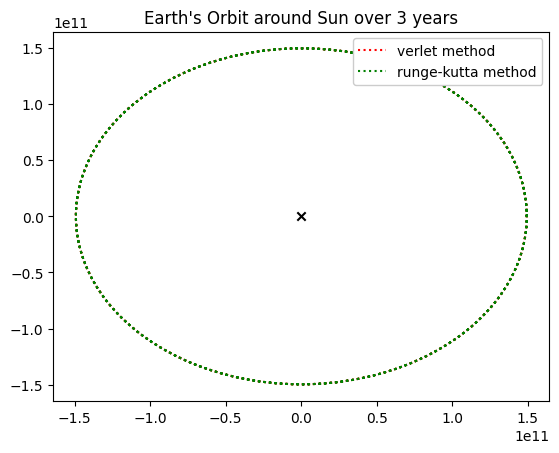

In [4]:
# Plot these positions

fig, ax = plt.subplots()

ax.plot(positions_verlet['x2'],positions_verlet['y2'], c = 'red', linestyle = ':', label = 'verlet method')
ax.plot(positions_rk['x2'],positions_rk['y2'], c = 'green', linestyle = ':', label = 'runge-kutta method')
ax.scatter(0,0, c = 'black', marker = 'x')
ax.set_title("Earth's Orbit around Sun over 3 years")
plt.legend(loc = 'upper right',framealpha = 1)

plt.show()

In [5]:
# We can calculate the eccentricity of the Earth's orbit in both cases, and the period of both Moon and Earth

eccentricity_verlet = calc_eccentricity(2,1,positions_verlet, orbitals)
eccentricity_rk = calc_eccentricity(2,1,positions_rk,orbitals)

period_verlet = manual_period(2,1,positions_verlet)
period_rk = manual_period(2,1,positions_rk)

period_moon_manual = manual_period(3,2,positions_verlet)/24
period_moon_kepler = kepler_period(3,2,positions_verlet, orbitals)/(3600*24)

print(f"For the verlet method, the eccentricity of Earth's orbit is {eccentricity_verlet}, and its period is {period_verlet/24} days")
print(f"For the runge_kutta method, the eccentricity of Earth's orbit is {eccentricity_rk}, and its period is {period_rk/24} days")
print(f"The period of the moon is {period_moon_manual} days using the manual method, and {period_moon_kepler} days using Kepler")

For the verlet method, the eccentricity of Earth's orbit is 0.0010928620957132529, and its period is 364.3125 days
For the runge_kutta method, the eccentricity of Earth's orbit is 0.0010929763917412307, and its period is 364.3125 days
The period of the moon is 27.463815789473685 days using the manual method, and 27.307557314843418 days using Kepler


In [23]:
# If we use Earths aphelion values instead we find a much more accurate calculation of its eccentricity

earth_corrected = Orbital ('Earth', 5.9772e24, 1.521e11, 0, 0, 2.929e4)
moon_corrected = Orbital('The Moon', 7.3476e22, 1.521e11, 3.84e8, -1.022e3, 2.929e4)

orbitals_corrected = (sun, earth_corrected, moon_corrected)

positions_corrected = position_update(orbitals_corrected)

eccentricity_corrected = calc_eccentricity(2,1, positions_corrected, orbitals_corrected)

print(f"The corrected eccentricity of Earth's orbit around the Sun is {eccentricity_corrected}")

The corrected eccentricity of Earth's orbit around the Sun is 0.016810991088796027


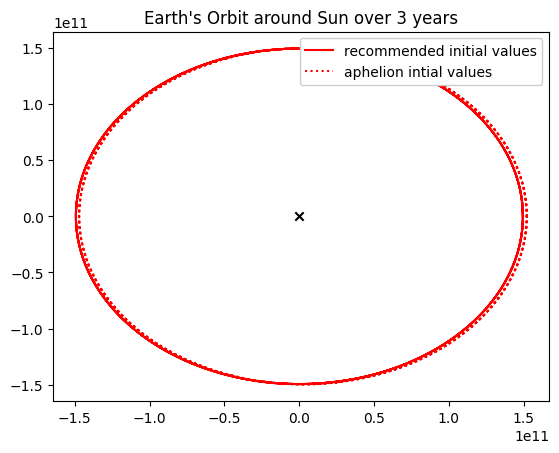

In [24]:
#Produce plot comparing Earth's orbit with recommended initial values vs aphelion intial values

fig, ax = plt.subplots()

ax.plot(positions_verlet['x2'],positions_verlet['y2'], c = 'red', linestyle = '-', label = 'recommended initial values')
ax.plot(positions_corrected['x2'],positions_corrected['y2'], c = 'red', linestyle = ':', label = 'aphelion intial values')
ax.scatter(0,0, c = 'black', marker = 'x')

plt.legend(loc = 'upper right', framealpha = 1)
ax.set_title("Earth's Orbit around Sun over 3 years")
plt.show()

## Changing solar mass

In [8]:
#Calculates the change in Earth's eccentricity due to changes in the mass of the Sun

#Create changing mass sun and arrays
sun_mass = sun.mass
sun_solar_changer = Orbital('The Sun', sun_mass, 0, 0 ,0, 0)

eccentricities_verlet, eccentricities_rk, solar_masses, positions = [],[],[],[]

num = 20
count = 1

for i in np.linspace(0.7,1.3,num):
    
    #Create orbitals and change mass of sun
    sun_solar_changer.mass = i * sun_mass
    orbitals_solar_changer = (sun_solar_changer, earth, moon)
    
    #Verlet method
    positions_solar_changer_verlet = position_update(orbitals_solar_changer, timelength = 3)
    eccentricity_solar_changer_verlet = calc_eccentricity(2,1,positions_solar_changer_verlet, orbitals_solar_changer)
    earth_solar_changer_verlet = [positions_solar_changer_verlet['x2'],positions_solar_changer_verlet['y2']]

    #Runge-Kutta method
    positions_solar_changer_rk = position_update(orbitals_solar_changer, method = 'runge-kutta', timelength = 3)
    eccentricity_solar_changer_rk = calc_eccentricity(2,1,positions_solar_changer_rk, orbitals_solar_changer)
    earth_solar_changer_rk = [positions_solar_changer_rk['x2'],positions_solar_changer_rk['y2']]
    
    #Add to arrays
    eccentricities_verlet.append(eccentricity_solar_changer_verlet)
    eccentricities_rk.append(eccentricity_solar_changer_rk)
    solar_masses.append(i)
    positions.append([earth_solar_changer_verlet,earth_solar_changer_rk])
    
    #Counter to show progress
    print(f'{count}/{num}')
    count+=1
    clear_output(wait = True)

20/20


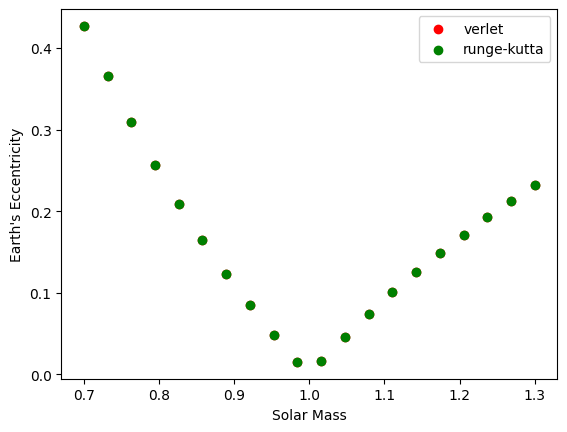

In [9]:
#Plot eccentricities for Verlet and Runge-Kutta

fig, ax = plt.subplots()

plt.scatter(solar_masses,eccentricities_verlet, label = 'verlet', c = 'red')
plt.scatter(solar_masses,eccentricities_rk, label = 'runge-kutta', c = 'green')
ax.set_xlabel('Solar Mass')
ax.set_ylabel("Earth's Eccentricity")
plt.legend()
plt.show()

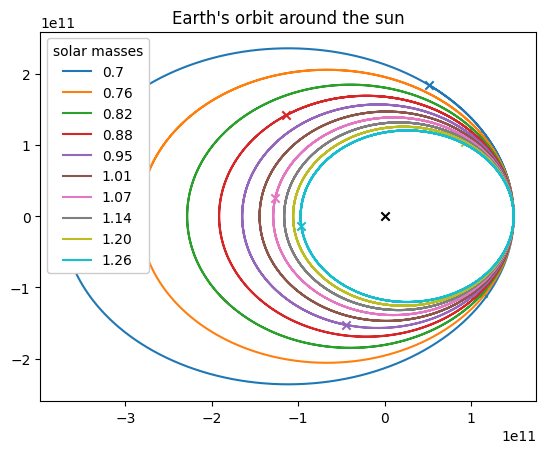

In [10]:
#Plot orbital paths, crosses show final point calculated along path

fig, ax = plt.subplots()
for i in range(0, num, 2):
    plt.plot(positions[i][0][0],positions[i][0][1], label = str(solar_masses[i])[:4])
    plt.scatter(positions[i][0][0][-1:],positions[i][0][1][-1:], marker = 'x')
plt.scatter(0,0,marker = 'x', c = 'black')
plt.legend(framealpha = 1, title = 'solar masses')
plt.title("Earth's orbit around the sun")
plt.show()


## Changing lunar mass

In [11]:
#Calculates the change in moon's period of orbit due to the mass of the moon

#Create changing mass moon and arrays
moon_mass = moon.mass
moon_lunar_changer = Orbital('The Moon', moon_mass, 1.495e11, 3.84e8, -1.022e3, 2.978e4)

periods_verlet, periods_rk, periods_kepler, lunar_masses, positions_lunar_changer = [],[],[],[],[]

num = 20
count = 1

for i in np.linspace(1,100,num):

    moon_lunar_changer.mass = i * moon_mass
    orbitals_lunar_changer = (sun, earth, moon_lunar_changer)
    
    #Verlet method and kepler method
    positions_lunar_changer_verlet = position_update(orbitals_lunar_changer, timelength = 0.3)
    period_verlet = manual_period(3 ,2, positions_lunar_changer_verlet)
    period_kepler = kepler_period(3 ,2, positions_lunar_changer_verlet, orbitals_lunar_changer)
    moon_lunar_changer_verlet = [positions_lunar_changer_verlet['x3']-positions_lunar_changer_verlet['x2'], positions_lunar_changer_verlet['y3']-positions_lunar_changer_verlet['y2']]
    
    #Runge-Kutta method
    positions_lunar_changer_rk = position_update(orbitals_lunar_changer, timelength = 0.3, method = 'runge-kutta')
    period_rk = manual_period(3 ,2, positions_lunar_changer_verlet)
    moon_lunar_changer_rk = [positions_lunar_changer_rk['x3']-positions_lunar_changer_rk['x2'], positions_lunar_changer_rk['y3']-positions_lunar_changer_rk['y2']]
    
    #Add to arrays
    periods_verlet.append(period_verlet/24)
    periods_rk.append(period_rk/24)
    periods_kepler.append(period_kepler/(24*3600))
    lunar_masses.append(i)
    positions_lunar_changer.append([moon_lunar_changer_verlet,moon_lunar_changer_rk])
    
    #Counter to show progress
    print(f'{count}/{num}')
    count+=1
    clear_output(wait = True)

20/20


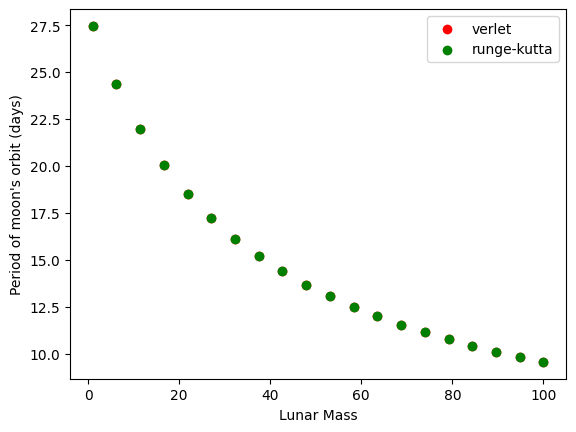

In [12]:
#Plot Verlet vs Runge-Kutta methods

fig, ax = plt.subplots()

plt.scatter(lunar_masses, periods_verlet, label = 'verlet', c = 'red')
plt.scatter(lunar_masses, periods_rk, label = 'runge-kutta', c = 'green')
ax.set_xlabel('Lunar Mass')
ax.set_ylabel("Period of moon's orbit (days)")
plt.legend()
plt.show()

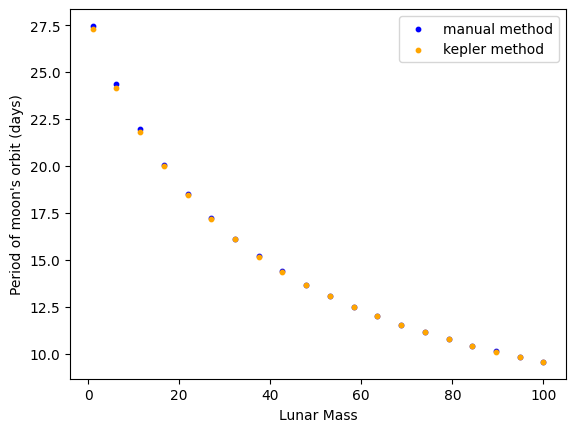

In [13]:
#Plot manual method vs kepler method

fig, ax = plt.subplots()

plt.scatter(lunar_masses, periods_verlet, label = 'manual method', c = 'blue', s = 10)
plt.scatter(lunar_masses, periods_kepler, label = 'kepler method', c = 'orange', s = 10)
ax.set_xlabel('Lunar Mass')
ax.set_ylabel("Period of moon's orbit (days)")
plt.legend()
plt.show()

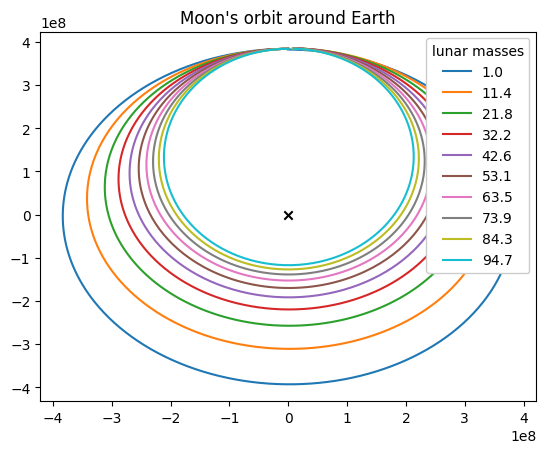

In [14]:
#Plot moon orbits

fig, ax = plt.subplots()
for i in range(0,num,2):
    plt.plot(positions_lunar_changer[i][0][0][:int(24*periods_verlet[i])],positions_lunar_changer[i][0][1][:int(24*periods_verlet[i])], label = str(lunar_masses[i])[:4])
plt.scatter(0,0,marker = 'x', c = 'black')
plt.legend(loc = 'upper right', framealpha = 1, title = 'lunar masses')
plt.title("Moon's orbit around Earth")
plt.show()

In [15]:
#Calculate acceleration at each point along the final orbit

positions_x = positions_lunar_changer[-1][0][0][:int(24*periods_verlet[-1])]
positions_y = positions_lunar_changer[-1][0][1][:int(24*periods_verlet[-1])]
moon_lunar_changer.mass = lunar_masses[-1]
orbitals_lunar_changer = (sun, earth, moon_lunar_changer)

accelerations_x, accelerations_y= [],[]

#go through positions along the orbit and find the acceleration at each
for i in range(len(positions_x)):
    
    moon_lunar_changer.position = np.array([positions_x[i], positions_y[i]])
    moon_lunar_changer.acceleration = moon_lunar_changer.calc_acceleration(orbitals_lunar_changer)
    
    accelerations_x.append(moon_lunar_changer.acceleration[0])
    accelerations_y.append(moon_lunar_changer.acceleration[1])

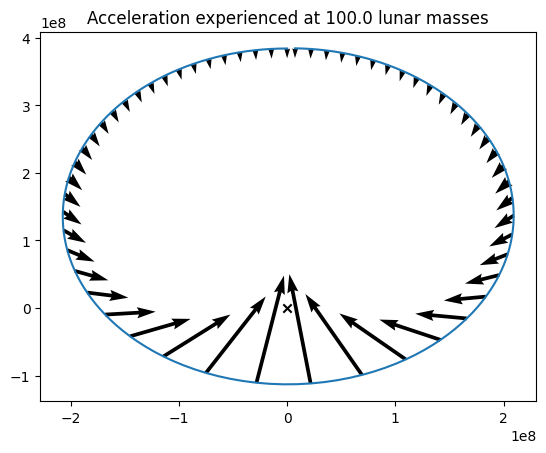

In [16]:
#Create plot showing these accelerations

fig, ax = plt.subplots()

ax.quiver(positions_x[::4], positions_y[::4], accelerations_x[::4], accelerations_y[::4])
ax.plot(positions_x[:int(24*periods_verlet[-1])], positions_y[:int(24*periods_verlet[-1])])
ax.scatter(0,0, marker = 'x', c ='black')
ax.set_title(f'Acceleration experienced at {lunar_masses[-1]} lunar masses')
plt.show()


## Modelling terrestial planets

In [17]:
#Define mercury, venus and mars

mercury = Orbital('Mercury', 3.285e23, 6.982e10, 0, 0, 3.88e4)
venus = Orbital('Venus', 4.867e24, 1.0894e11, 0, 0, 3.45e4)
mars = Orbital('Mars', 6.39e23, 2.49e11, 0, 0, 2.2e4)

In [18]:
orbitals_terrestrial = [sun,mercury,venus,earth,mars]

In [19]:
#Calculate positions

positions_terrestrial = position_update(orbitals_terrestrial, timelength = 1)

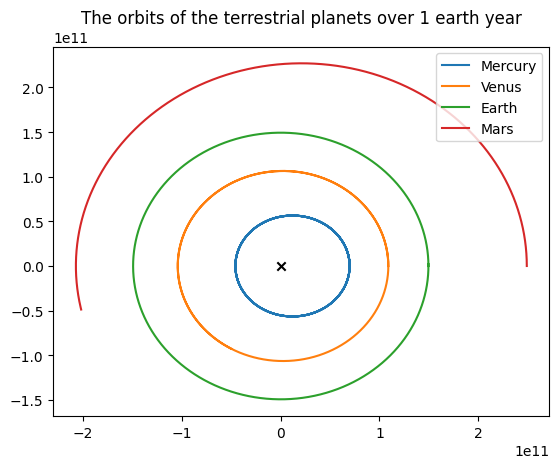

In [20]:
#Plot orbits across 1 Earth year

ax, fig = plt.subplots()
plt.plot(positions_terrestrial['x2'],positions_terrestrial['y2'], label = mercury.name)
plt.plot(positions_terrestrial['x3'],positions_terrestrial['y3'], label = venus.name)
plt.plot(positions_terrestrial['x4'],positions_terrestrial['y4'], label = earth.name)
plt.plot(positions_terrestrial['x5'],positions_terrestrial['y5'], label = mars.name)
plt.scatter(0,0, c = 'black', marker = 'x')

plt.legend(loc = 'upper right')
plt.title('The orbits of the terrestrial planets over 1 earth year')
plt.show()

## Demonstrating binary satellite planet system

In [21]:
#Define two planets and calculate positions

planet_1 = Orbital('planet 1', 5.972E24, 0,0,0,0)
planet_2 = Orbital('planet 2', 5.972E24, 3.84e8,0,0,1024)

system = [planet_1, planet_2]

positions_system = position_update(system, timelength = 0.1)

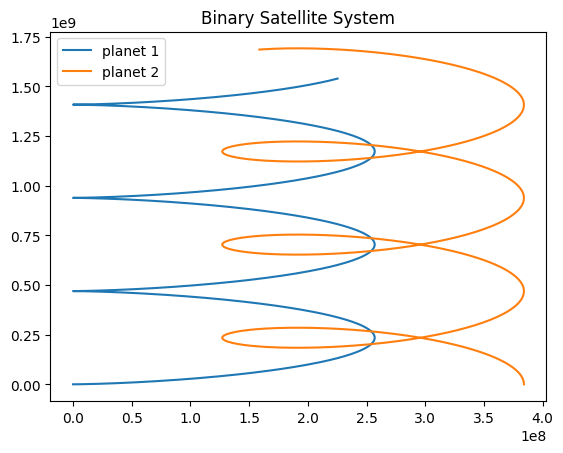

In [22]:
#Plot paths

fig, ax= plt.subplots()

ax.plot(positions_system['x1'],positions_system['y1'], label = planet_1.name)
ax.plot(positions_system['x2'],positions_system['y2'], label = planet_2.name)

plt.legend()
plt.title('Binary Satellite System')
plt.show()